# 第二章　確率分布と統計モデルの最尤推定

In [1]:
import requests
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson

# 2.1 種子数の統計モデリング

In [17]:
# 教科書のデータを手動で作成
flower_data = [2,2,4,6,4,5,2,3,1,2,0,4,3,3,3,3,4,2,7,2,4,3,3,3,4,3,7,5,3,1,7,6,4,6,5,2,4,7,2,2,6,2,4,5,4,5,1,3,2,3]

# pandasを使ってsummaryを出力
pd.DataFrame(pd.Series(flower_data).describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
0,50.0,3.56,1.72804,0.0,2.0,3.0,4.75,7.0


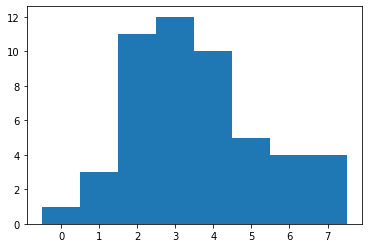

In [20]:
# ヒストグラムを描画
plt.hist(flower_data, bins=np.arange(-0.5, 8))
plt.show()

In [32]:
# https://www.self-study-blog.com/dokugaku/python-pandas-numpy-frequency-table/
# このサイトを参考に度数分布表を作成する関数を作成
def frequency_table(data, stur=False):
  data_len = len(data)
  print('データ数：', data_len)
  #スタージェンスの公式でbinの数を求める
  if stur is True:
    b = round(1 + np.log2(data_len))
    hist, bins = np.histogram(data, bins=b)
  else:
    hist, bins = np.histogram(data)
  #データフレーム作成
  df = pd.DataFrame({'以上': bins[:-1],'以下': bins[1:],'階級値': (bins[:-1]+bins[1:])/2,'度数': hist})
  #相対度数の計算
  df['相対度数'] = df['度数'] / data_len
  #累積度数の計算
  df['累積度数'] = np.cumsum(df['度数'])
  #累積相対度数の計算
  df['累積相対度数'] = np.cumsum(df['相対度数'])
  return df

In [27]:
frequency_table(flower_data)

データ数： 50


,以上,以下,階級値,度数,相対度数,累積度数,累積相対度数
0,0.0,0.7,0.35,1,0.02,1,0.02
1,0.7,1.4,1.05,3,0.06,4,0.08
2,1.4,2.1,1.75,11,0.22,15,0.30
3,2.1,2.8,2.45,0,0.00,15,0.30
4,2.8,3.5,3.15,12,0.24,27,0.54
5,3.5,4.2,3.85,10,0.20,37,0.74
6,4.2,4.9,4.55,0,0.00,37,0.74
7,4.9,5.6,5.25,5,0.10,42,0.84
8,5.6,6.3,5.95,4,0.08,46,0.92
9,6.3,7.0,6.65,4,0.08,50,1.00


In [28]:
# 標本分散を出力
np.var(flower_data)

2.9264000000000006

In [30]:
# 標本標準偏差を出力
np.std(flower_data)

1.710672382427448

In [31]:
# 標本標準偏差 = √標本分散

np.sqrt(np.var(flower_data))

1.710672382427448

# 2.2 データと確率分布の対応関係を眺める

**確率分布とは**<br>
確率変数の値とそれが出現する確率を対応させたもの<br>
今回だと、ある植物個体iの種子数$y_i$のように個体ごとにばらつく変数

種子数の分布はポアソン分布に対応するらしいので、とりあえずポアソン分布で色々考えていく

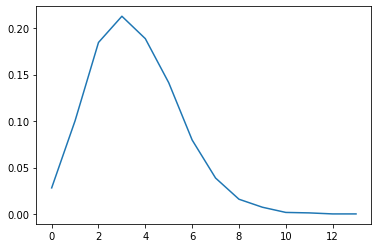

In [35]:
# 平均3.56のポアソン分布を作成
poisson_values = np.random.poisson(lam=3.56, size=10000)
prod = (pd.value_counts(poisson_values) / 10000).sort_index()
plt.plot(prod.index, prod.values)
plt.show()

⬆︎<br>
ある植物の種子数がゼロである確率は0.03くらい<br>
一番確率が高くなるのは1個体に3個の種子を持つときで確率は0.21くらい

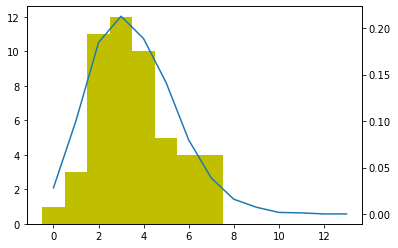

In [37]:
# ヒストグラムと重ねる
fig, ax1 = plt.subplots()
plt.hist(flower_data, bins=np.arange(-0.5, 8), color=['y'])
ax2 = ax1.twinx()
ax2.plot(prod)
plt.show()